# **Principal Component Analysis**

## 2 - Application of Eigenvalues and Eigenvectors: Principal Component Analysis

Remember that to apply PCA on any dataset you will begin by defining the covariance matrix. After that you will compute the eigenvalues and eigenvectors of this covariance matrix. Each of these eigenvectors will be a **principal component**. To perform the dimensionality reduction, you will take the $k$ principal components associated to the $k$ biggest eigenvalues, and transform the original data by projecting it onto the direction of these principal components (eigenvectors).

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import utils
import scipy.sparse.linalg

In [63]:
imgs = utils.load_images('dataset_images')

height, width = imgs[0].shape

print(f"O dataset possui {len(imgs)} imagens com o tamanho de {height}x{width} pixels.")

O dataset possui 55 imagens com o tamanho de 64x64 pixels.


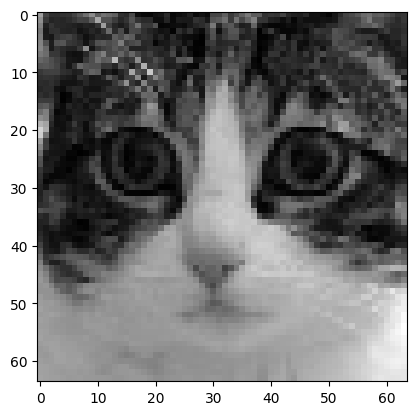

In [64]:
plt.imshow(imgs[0], cmap='gray')
plt.show()

In [65]:
imgs_flatten = np.array([im.reshape(-1) for im in imgs])
print(f'imgs_flatten shape: {imgs_flatten.shape}')

imgs_flatten shape: (55, 4096)


### Get the covariance matrix

$$\mathrm{imgs\_flatten} = \begin{bmatrix} x_{1,1} & x_{1,2} & \ldots & x_{1,4096}\\
                                           x_{2,1} & x_{2,2} & \ldots & x_{2,4096} \\
                                           \vdots & \vdots & \ddots & \vdots \\
                                           x_{55,1} & x_{55,2} & \ldots & x_{55,4096}\end{bmatrix}$$


$$\Sigma = \begin{bmatrix}Var(X_1) & Cov(X_1, X_2) & \ldots & Cov(X_1, X_{4096}) \\
                          Cov(X_1, X_2) & Var(X_2) & \ldots & Cov(X_2, X_{4096})\\
                          \vdots & \vdots & \ddots & \vdots \\
                          Cov(X_1,X_{4096}) & Cov(X_2, X_{4096}) &\ldots & Var(X_{4096})\end{bmatrix}$$

In [66]:
u = np.mean(imgs_flatten, axis = 0)
print(u.reshape(-1,1))

[[100.16363636]
 [ 96.61818182]
 [100.21818182]
 ...
 [133.65454545]
 [133.61818182]
 [133.54545455]]


$$X = \begin{bmatrix} (x_{1,1}- \mu_1) & (x_{1,2}- \mu_2) & \ldots & (x_{1,4096}- \mu_{4096})\\
                                           (x_{2,1}- \mu_1) & (x_{2,2}- \mu_2) & \ldots & (x_{2,4096}- \mu_{4096}) \\
                                           \vdots & \vdots & \ddots & \vdots \\
                                           (x_{55,1}- \mu_1) & (x_{55,2}- \mu_2) & \ldots & (x_{55,4096}- \mu_{4096})\end{bmatrix}$$

In [67]:
# Centralização dos dados:
X = imgs_flatten - u
print(X[:10])

[[ 54.83636364 -30.61818182 -54.21818182 ...  85.34545455  87.38181818
   88.45454545]
 [  1.83636364  -1.61818182 -11.21818182 ... -53.65454545 -56.61818182
  -62.54545455]
 [ 89.83636364 120.38181818  89.78181818 ...  76.34545455  77.38181818
   77.45454545]
 ...
 [-24.16363636 -25.61818182 -39.21818182 ... -46.65454545 -68.61818182
  -56.54545455]
 [-76.16363636 -75.61818182 -75.21818182 ... -27.65454545 -37.61818182
  -58.54545455]
 [ 33.83636364  35.38181818  39.78181818 ...  11.34545455   2.38181818
   -2.54545455]]


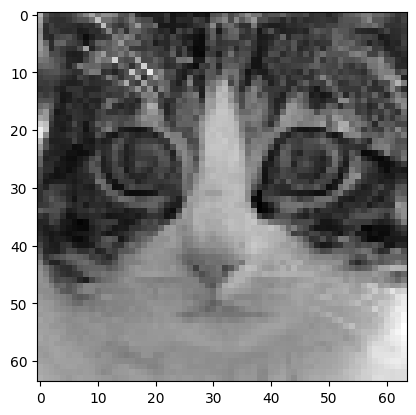

In [68]:
plt.imshow(X[0].reshape(64,64),cmap='gray')
plt.show()

In [69]:
def get_cov_matrix(X):

    cov_matrix = np.dot(X.T, X)

    cov_matrix = (1/(X.shape[0]-1)) * cov_matrix

    return cov_matrix

cov_matrix = get_cov_matrix(X)

print(f"Matrix de covariância (shape): {cov_matrix.shape}")
print(f"Matriz de covariância: \n{cov_matrix}")

Matrix de covariância (shape): (4096, 4096)
Matriz de covariância: 
[[4222.54680135 3769.3969697  3645.57474747 ... -595.66464646
  -498.88080808 -423.7020202 ]
 [3769.3969697  4055.05521886 3971.80707071 ... -398.46767677
  -385.75959596 -323.65824916]
 [3645.57474747 3971.80707071 4051.61818182 ... -456.14545455
  -448.17441077 -396.30639731]
 ...
 [-595.66464646 -398.46767677 -456.14545455 ... 4917.52659933
  4630.56936027 4428.06228956]
 [-498.88080808 -385.75959596 -448.17441077 ... 4630.56936027
  4525.203367   4381.91582492]
 [-423.7020202  -323.65824916 -396.30639731 ... 4428.06228956
  4381.91582492 4392.99326599]]


### Compute the eigenvalues and eigenvectors

In [70]:
eigenvals, eigenvecs = scipy.sparse.linalg.eigsh(cov_matrix, k=55)
print(f"eigenvalues = \n{eigenvals}")
print(f"eigenvecs shape: {eigenvecs.shape}")

eigenvalues = 
[-1.51338988e-10  2.19105282e+04  2.33030074e+04  2.40582049e+04
  2.72341811e+04  2.99220267e+04  3.16574516e+04  3.21788711e+04
  3.43231831e+04  3.55011228e+04  3.78637282e+04  4.04283319e+04
  4.12032829e+04  4.22629260e+04  4.65603815e+04  4.77976148e+04
  5.07624113e+04  5.19458236e+04  5.47598738e+04  5.66390862e+04
  5.78706208e+04  6.33126985e+04  6.52959869e+04  6.98032642e+04
  7.16254712e+04  7.27203304e+04  7.62715372e+04  7.79191734e+04
  8.00865836e+04  8.72859902e+04  9.32609333e+04  9.87732297e+04
  1.06459600e+05  1.08501285e+05  1.21978091e+05  1.27572599e+05
  1.39030088e+05  1.40998536e+05  1.50336283e+05  1.69236146e+05
  1.80704765e+05  2.02171392e+05  2.03532869e+05  2.12778537e+05
  2.84691552e+05  2.93228197e+05  3.83726589e+05  3.99184596e+05
  4.79311089e+05  8.39689089e+05  8.78711734e+05  1.01109306e+06
  1.53661726e+06  2.48371088e+06  4.19935728e+06]
eigenvecs shape: (4096, 55)


In [71]:
eigenvals = eigenvals[::-1]
eigenvecs = eigenvecs[:,::-1]

print(f"eigenvalues = \n{eigenvals}")

eigenvalues = 
[ 4.19935728e+06  2.48371088e+06  1.53661726e+06  1.01109306e+06
  8.78711734e+05  8.39689089e+05  4.79311089e+05  3.99184596e+05
  3.83726589e+05  2.93228197e+05  2.84691552e+05  2.12778537e+05
  2.03532869e+05  2.02171392e+05  1.80704765e+05  1.69236146e+05
  1.50336283e+05  1.40998536e+05  1.39030088e+05  1.27572599e+05
  1.21978091e+05  1.08501285e+05  1.06459600e+05  9.87732297e+04
  9.32609333e+04  8.72859902e+04  8.00865836e+04  7.79191734e+04
  7.62715372e+04  7.27203304e+04  7.16254712e+04  6.98032642e+04
  6.52959869e+04  6.33126985e+04  5.78706208e+04  5.66390862e+04
  5.47598738e+04  5.19458236e+04  5.07624113e+04  4.77976148e+04
  4.65603815e+04  4.22629260e+04  4.12032829e+04  4.04283319e+04
  3.78637282e+04  3.55011228e+04  3.43231831e+04  3.21788711e+04
  3.16574516e+04  2.99220267e+04  2.72341811e+04  2.40582049e+04
  2.33030074e+04  2.19105282e+04 -1.51338988e-10]


Each of the eigenvectors you found will represent one principal component. The eigenvector associated with the largest eigenvalue will be the first principal component, the eigenvector associated with the second largest eigenvalue will be the second principal component, and so on. 

It is pretty interesting to see that each principal component usually extracts some relevant features, or patterns from each image.

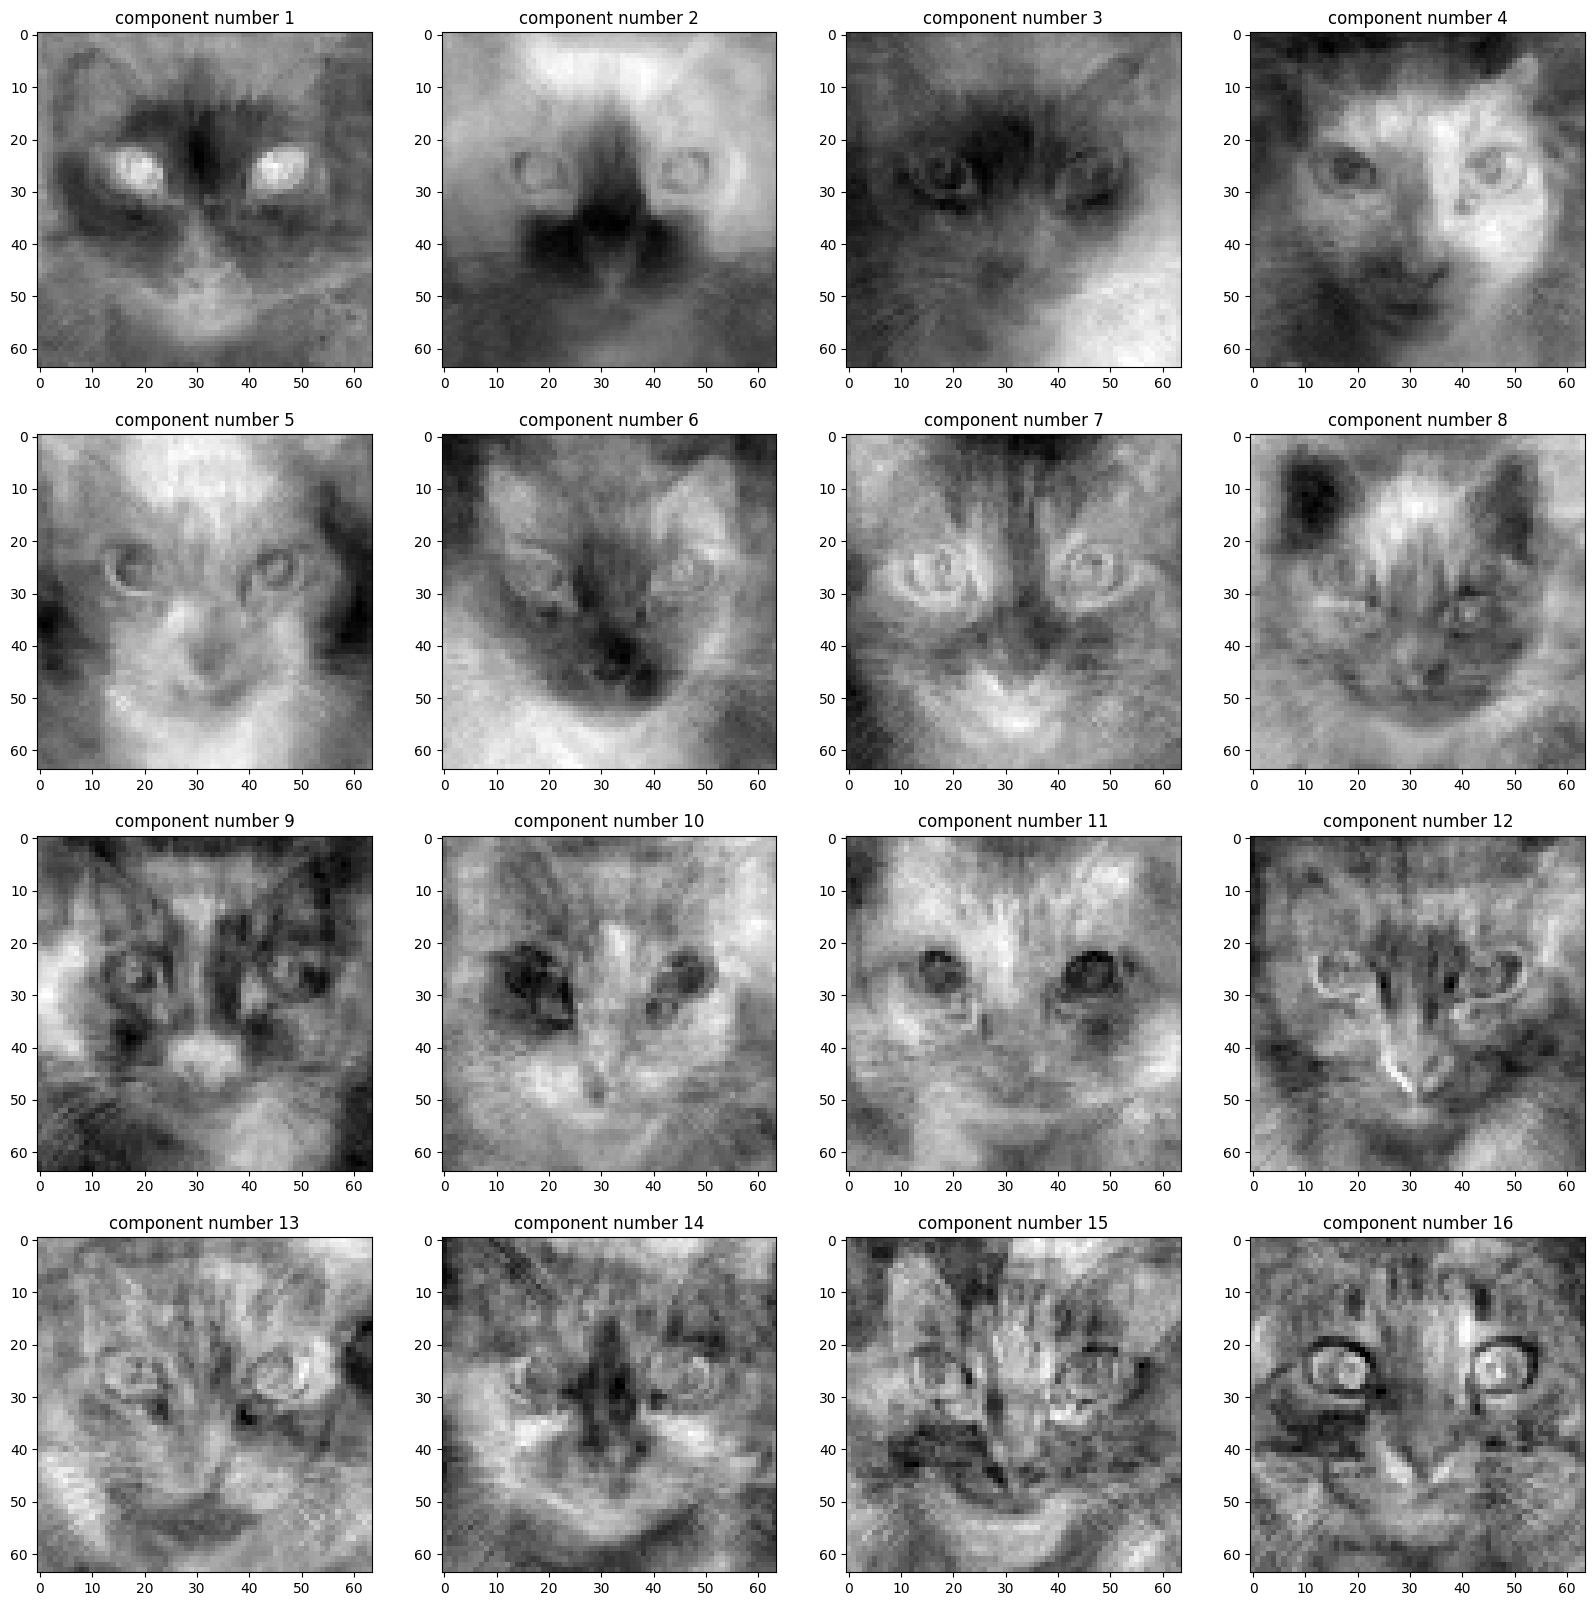

In [72]:
fig, ax = plt.subplots(4,4,figsize = (20,20))

for n in range(4):

    for k in range(4):

        ax[n,k].imshow(eigenvecs[:,n*4+k].reshape(height,width), cmap = 'gray')
        ax[n,k].set_title(f'component number {n*4+k+1}')

### Transform the centered data with PCA

In [73]:
def perform_PCA(X, eigenvecs, k):

    V = eigenvecs[:,:k]
    Xred = X @ V

    return Xred

Xred2 = perform_PCA(X, eigenvecs,2)
print(f'Xred2 shape: {Xred2.shape}')

Xred2 shape: (55, 2)


### Analyzing the dimensionality reduction in 2 dimensions

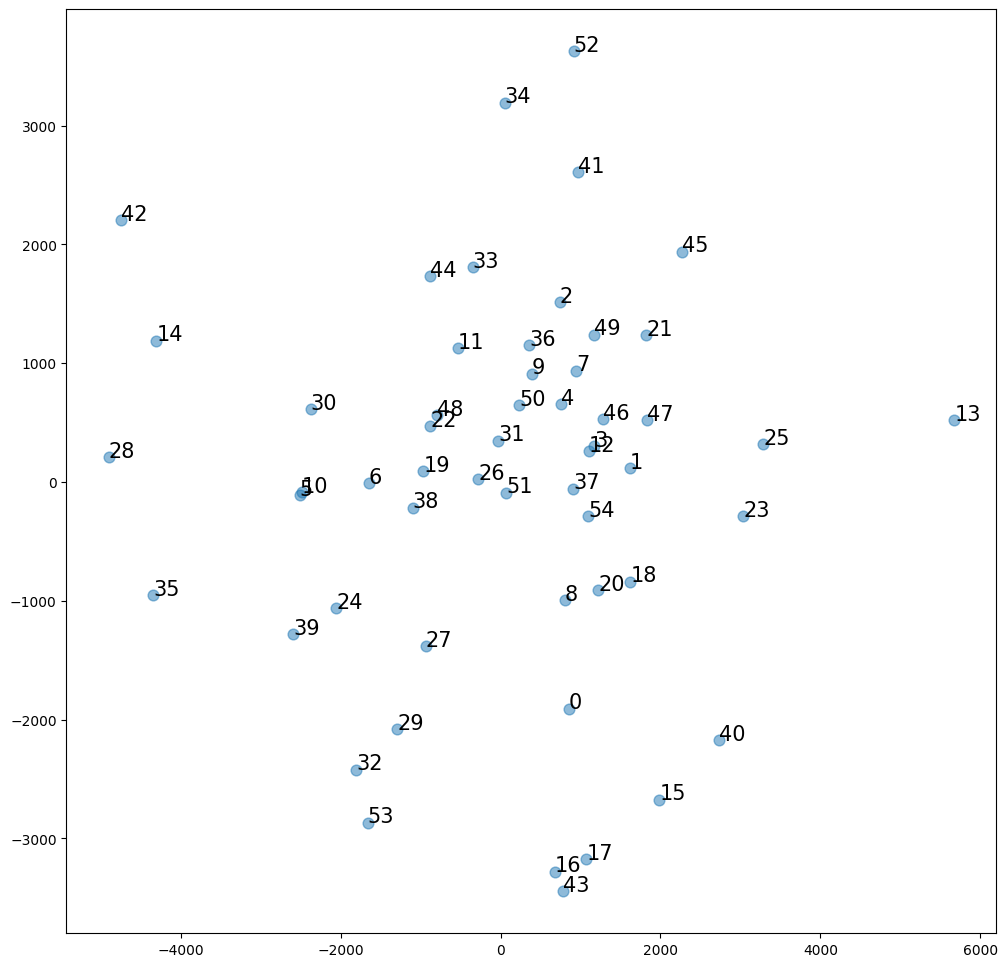

In [74]:
utils.plot_reduced_data(Xred2)

If two points end up being close to each other in this representation, it is expected that the original pictures should be similar as well.

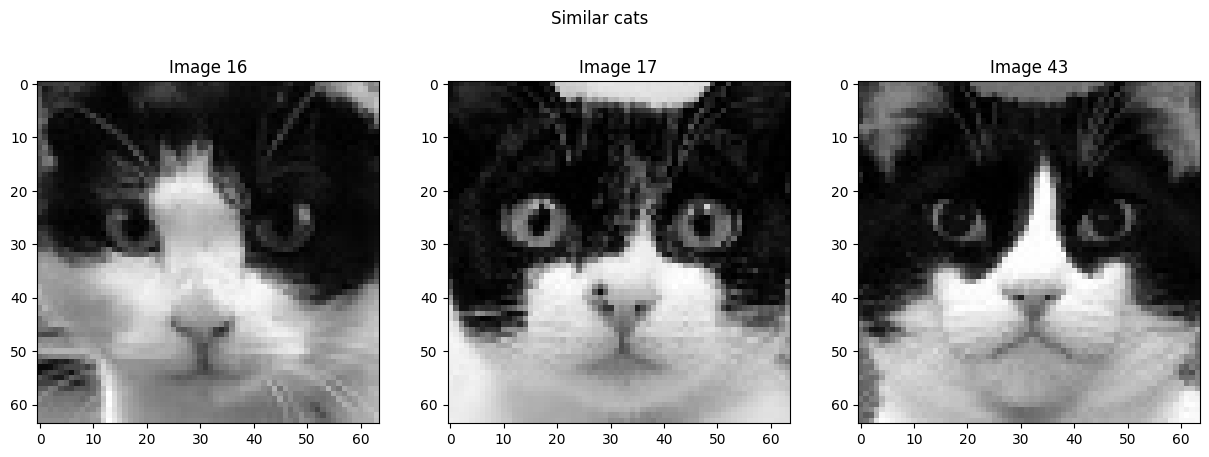

In [75]:
# 16,17 e 43

fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(imgs[16], cmap='gray')
ax[0].set_title('Image 16')
ax[1].imshow(imgs[17], cmap='gray')
ax[1].set_title('Image 17')
ax[2].imshow(imgs[43], cmap='gray')
ax[2].set_title('Image 43')
plt.suptitle('Similar cats')

plt.show()

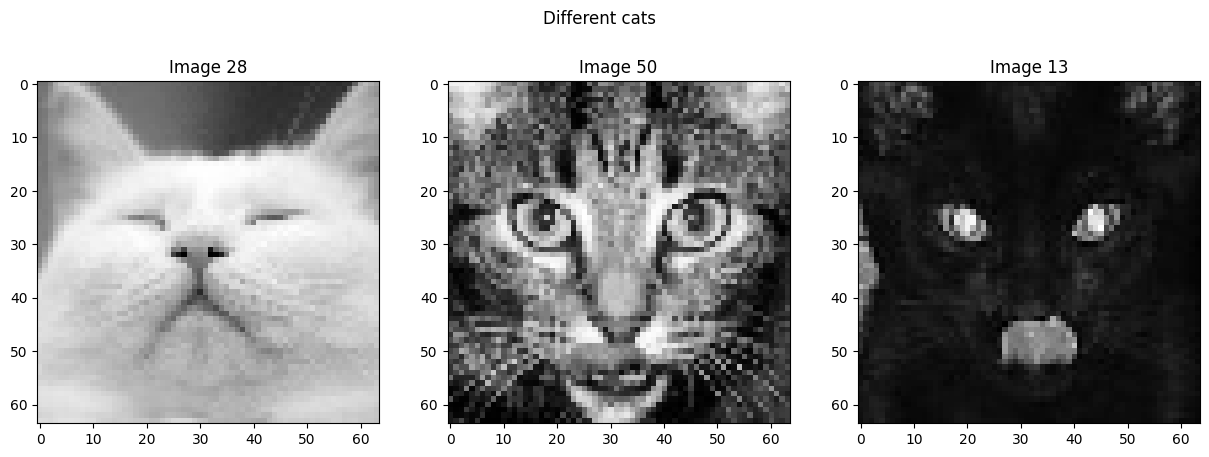

In [76]:
# 28, 50 e 13
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(imgs[28], cmap='gray')
ax[0].set_title('Image 28')
ax[1].imshow(imgs[50], cmap='gray')
ax[1].set_title('Image 50')
ax[2].imshow(imgs[13], cmap='gray')
ax[2].set_title('Image 13')
plt.suptitle('Different cats')

plt.show()

### Reconstructing the images from the eigenvectors

In [77]:
def reconstruct_image(Xred, eigenvecs):

    X_reconstructed = Xred.dot(eigenvecs[:,:Xred.shape[1]].T)

    return X_reconstructed


Text(0.5, 1.0, 'reconstructed from 30 components')

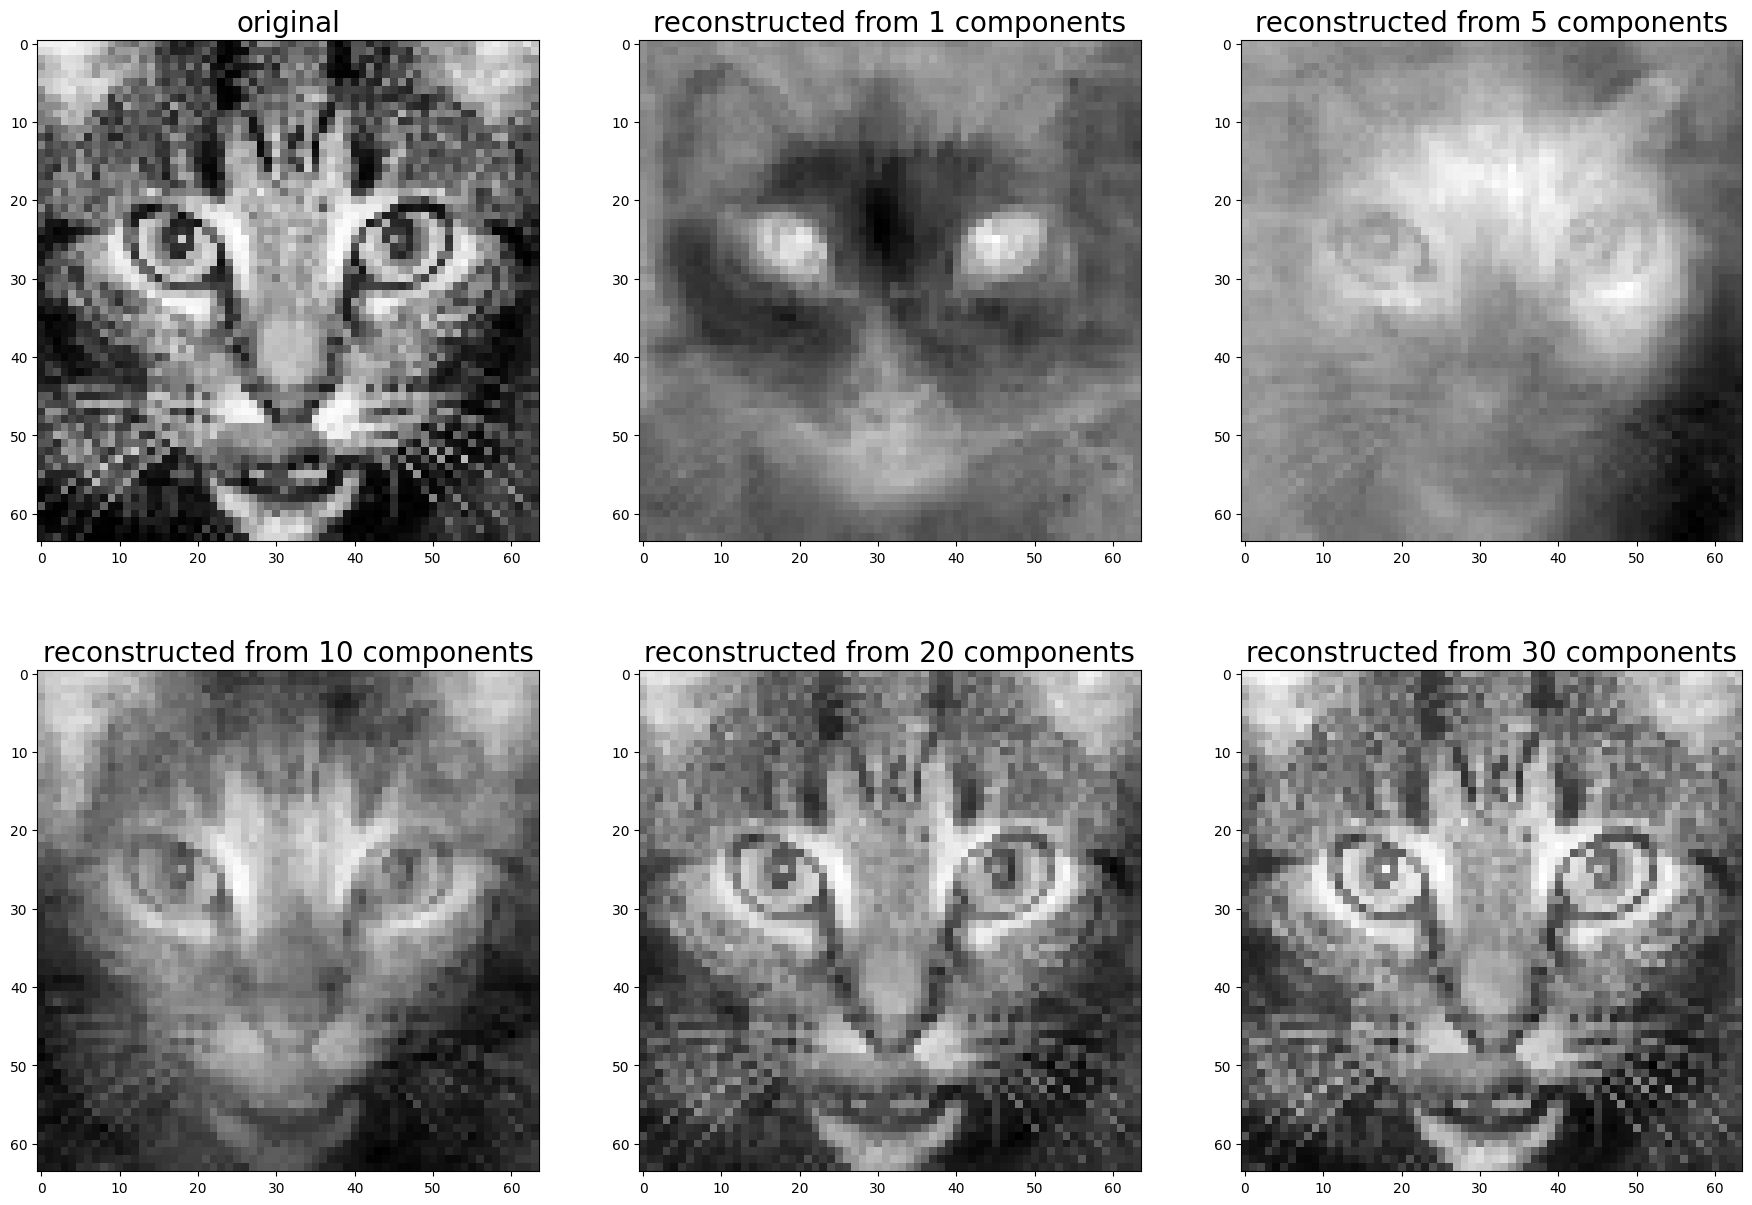

In [78]:
Xred1 = perform_PCA(X, eigenvecs,1) # reduce dimensions to 1 component
Xred5 = perform_PCA(X, eigenvecs, 5) # reduce dimensions to 5 components
Xred10 = perform_PCA(X, eigenvecs, 10) # reduce dimensions to 10 components
Xred20 = perform_PCA(X, eigenvecs, 20) # reduce dimensions to 20 components
Xred30 = perform_PCA(X, eigenvecs, 30) # reduce dimensions to 30 components
Xrec1 = reconstruct_image(Xred1, eigenvecs) # reconstruct image from 1 component
Xrec5 = reconstruct_image(Xred5, eigenvecs) # reconstruct image from 5 components
Xrec10 = reconstruct_image(Xred10, eigenvecs) # reconstruct image from 10 components
Xrec20 = reconstruct_image(Xred20, eigenvecs) # reconstruct image from 20 components
Xrec30 = reconstruct_image(Xred30, eigenvecs) # reconstruct image from 30 components

fig, ax = plt.subplots(2,3, figsize=(22,15))
ax[0,0].imshow(imgs[50], cmap='gray')
ax[0,0].set_title('original', size=20)
ax[0,1].imshow(Xrec1[50].reshape(height,width), cmap='gray')
ax[0,1].set_title('reconstructed from 1 components', size=20)
ax[0,2].imshow(Xrec5[50].reshape(height,width), cmap='gray')
ax[0,2].set_title('reconstructed from 5 components', size=20)
ax[1,0].imshow(Xrec10[50].reshape(height,width), cmap='gray')
ax[1,0].set_title('reconstructed from 10 components', size=20)
ax[1,1].imshow(Xrec20[50].reshape(height,width), cmap='gray')
ax[1,1].set_title('reconstructed from 20 components', size=20)
ax[1,2].imshow(Xrec30[50].reshape(height,width), cmap='gray')
ax[1,2].set_title('reconstructed from 30 components', size=20)

### 2.7 Explained variance

When deciding how many components to use for the dimensionality reduction, one good criteria to consider is the explained variance. 

The explained variance is measure of how much variation in a dataset can be attributed to each of the principal components (eigenvectors). In other words, it tells us how much of the total variance is “explained” by each component. 

In PCA, the first principal component, i.e. the eigenvector associated to the largest eigenvalue, is the one with greatest explained variance. As you might remember from the lectures, the goal of PCA is to reduce the dimensionality by projecting data in the directions with biggest variability. 

In practical terms, the explained variance of a principal component is the ratio between its associated eigenvalue and the sum of all the eigenvalues. So, for our example, if you want the explained variance of the first principal component you will need to do $\frac{\lambda_1}{\sum_{i=1}^{55} \lambda_i}$

Next, let's plot the explained variance of each of the 55 principal components, or eigenvectors. Don't worry about the fact that you only computed 55 eigenvalue-eigenvector pairs, recall that all the remaining eigenvalues of the covariance matrix are zero, and thus won't add enything to the explained variance.

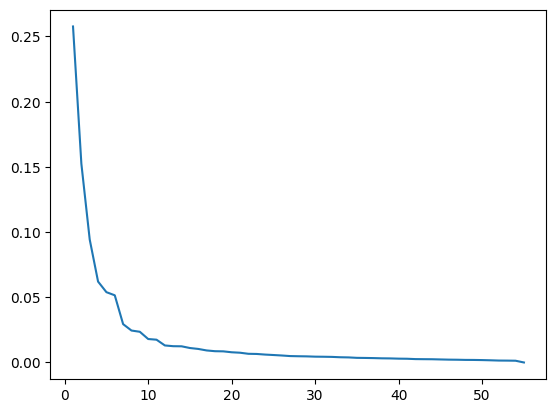

In [79]:
explained_variance = eigenvals/sum(eigenvals)
plt.plot(np.arange(1,56), explained_variance)

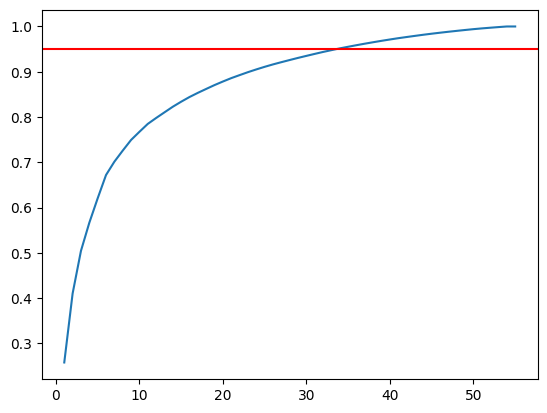

In [80]:
explained_cum_variance = np.cumsum(explained_variance)
plt.plot(np.arange(1,56), explained_cum_variance)
plt.axhline(y=0.95, color='r')

In red you can see the 95% line. This means that if you want to be able to explain 95% of the variance of your data you need to keep 35 principal components. 

Let's see how some of the original images look after the reconstruction when using 35 principal components 

Text(0.5, 1.0, 'Reconstructed')

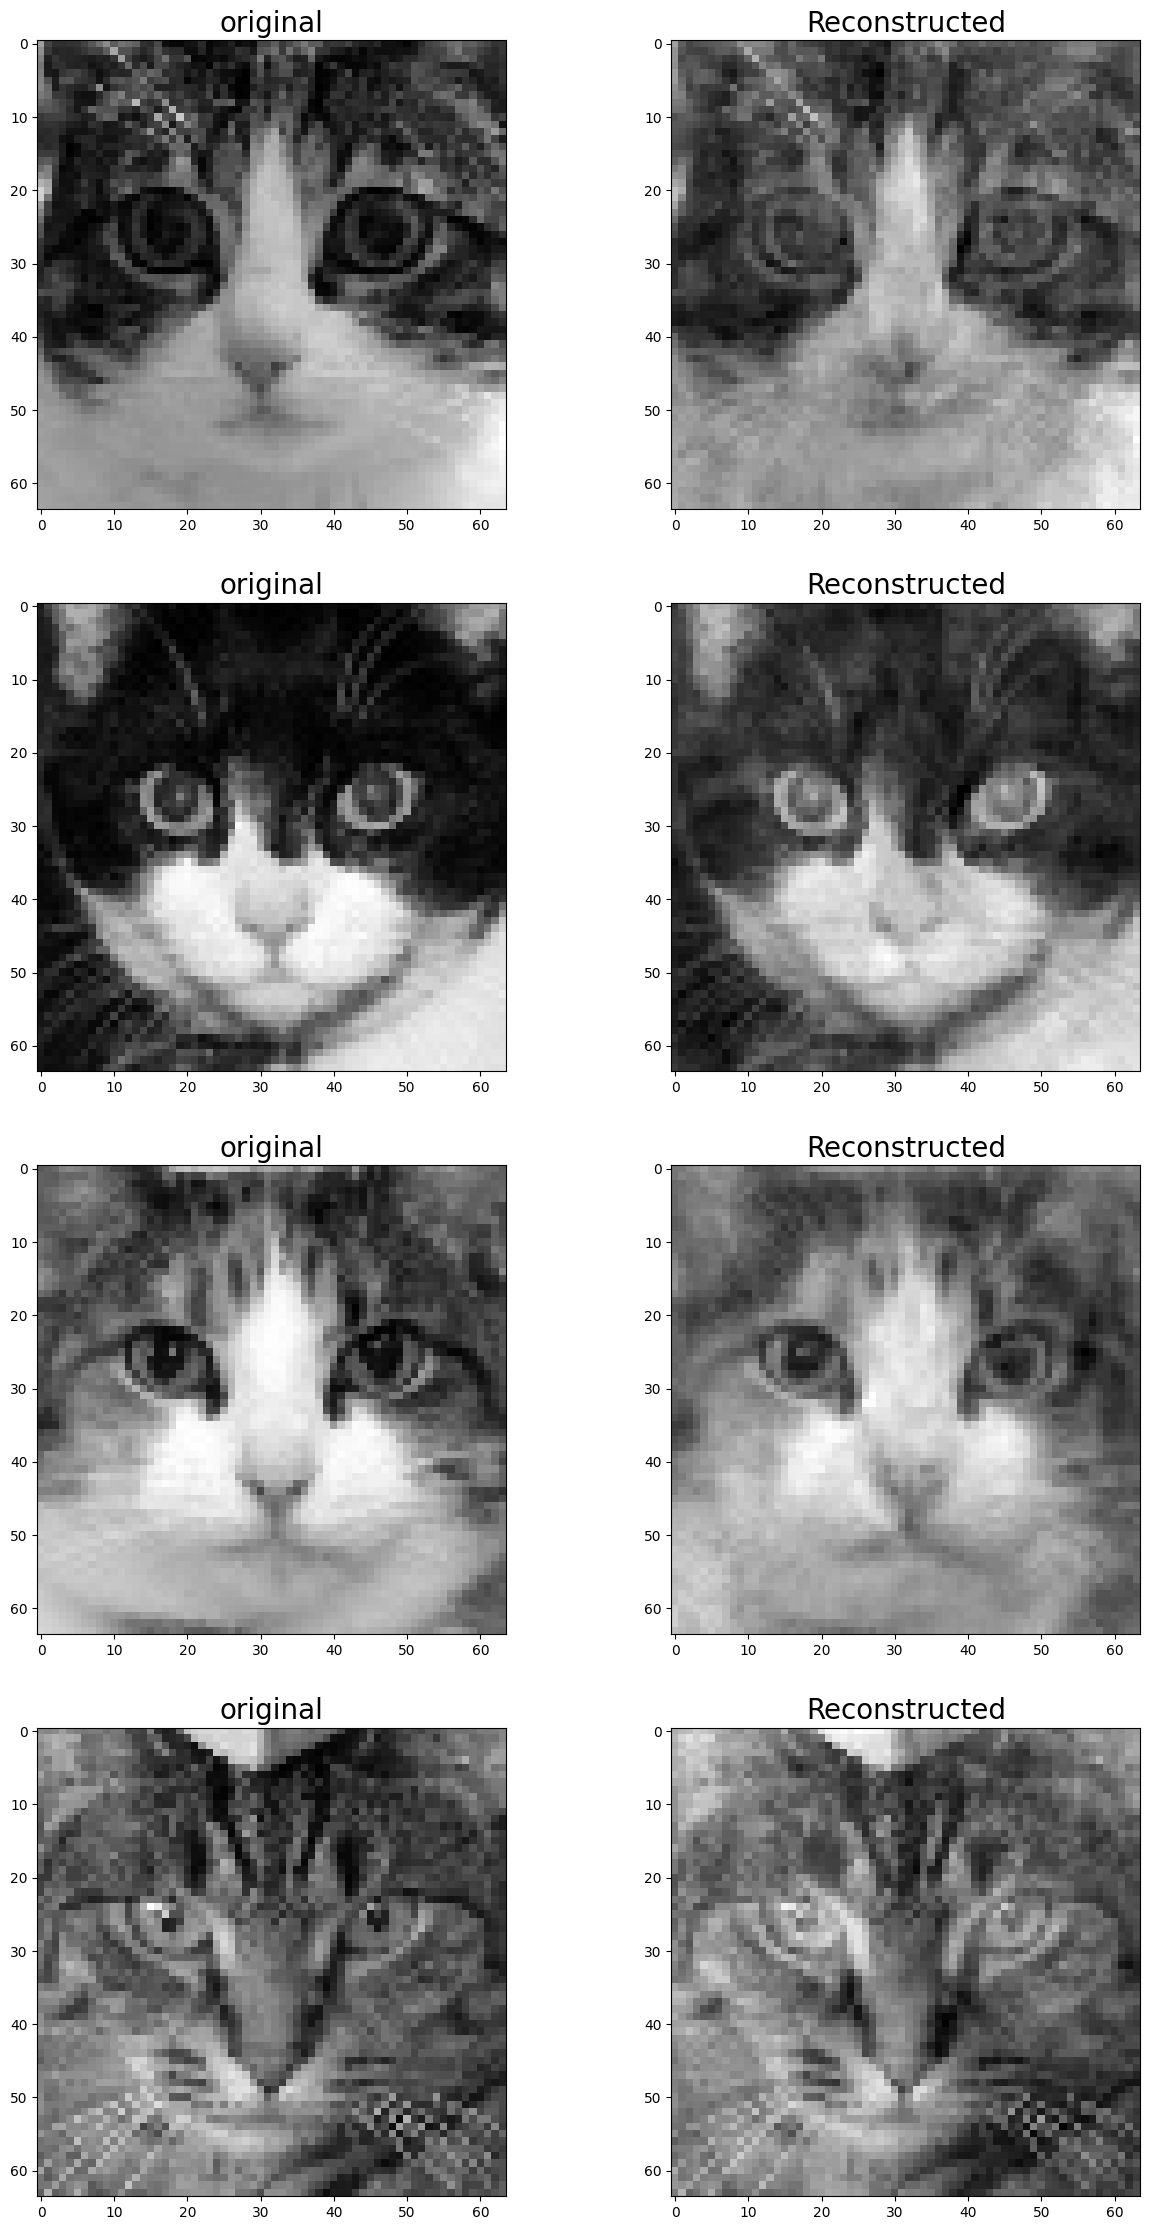

In [81]:
Xred35 = perform_PCA(X, eigenvecs, 35) # reduce dimensions to 35 components
Xrec35 = reconstruct_image(Xred35, eigenvecs) # reconstruct image from 35 components

fig, ax = plt.subplots(4,2, figsize=(15,28))
ax[0,0].imshow(imgs[0], cmap='gray')
ax[0,0].set_title('original', size=20)
ax[0,1].imshow(Xrec35[0].reshape(height, width), cmap='gray')
ax[0,1].set_title('Reconstructed', size=20)

ax[1,0].imshow(imgs[15], cmap='gray')
ax[1,0].set_title('original', size=20)
ax[1,1].imshow(Xrec35[15].reshape(height, width), cmap='gray')
ax[1,1].set_title('Reconstructed', size=20)

ax[2,0].imshow(imgs[32], cmap='gray')
ax[2,0].set_title('original', size=20)
ax[2,1].imshow(Xrec35[32].reshape(height, width), cmap='gray')
ax[2,1].set_title('Reconstructed', size=20)

ax[3,0].imshow(imgs[54], cmap='gray')
ax[3,0].set_title('original', size=20)
ax[3,1].imshow(Xrec35[54].reshape(height, width), cmap='gray')
ax[3,1].set_title('Reconstructed', size=20)
